In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-rated-coffee/top-rated-coffee-clean.csv
/kaggle/input/top-rated-coffee/top-rated-coffee.csv


# DATA LOADING AND PREPROCESSING

In [2]:
df_uncleaned = pd.read_csv('/kaggle/input/top-rated-coffee/top-rated-coffee.csv')

In [3]:
df_uncleaned

,coffee_name,total_score,roaster_location,coffee_origin,roast_level,agtron,est._price
0,Colombia Finca Campo Hermosa,94,"Cleveland, Tennessee","Quindio Department, Colombia",Light,62/82,$29.99/8 ounces
1,Colombia Finca La Sirena Mango Co-Ferment,94,"Cleveland, Tennessee","Quindio Department, Colombia",Light,63/87,$22.99/8 ounces
2,In Bloom,94,"Jersey City, New Jersey",Colombia; Ethiopia,Light,64/88,$25.00/250 grams
3,Ethiopia Washed Kaffa Gimbo Lot Rich Espresso,96,"Chia-Yi, Taiwan","Gimbo, Kaffa Province, Ethiopia",Medium-Light,55/77,NT $250/8 ounces
4,Ethiopia Natural Gute Bona,95,"Chia-Yi, Taiwan","Sidamo growing region, southern Ethiopia",Medium-Light,62/78,NT $400/8 ounces
...,...,...,...,...,...,...,...
2212,Finca La Tacita,95,"Boise, Idaho",NaN,NaN,/,NaN
2213,Ethiopia Yirgacheffe,94,"Fairbanks, Alaska",NaN,NaN,/,NaN
2214,Elm City House Blend,NR,"New Haven, Connecticut",NaN,Dark,38/43,NaN
2215,Vienna Roast,NR,"Lake Tahoe, California",NaN,Medium-Dark,38/44,NaN


In [4]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_name       2217 non-null   object
 1   total_score       2217 non-null   object
 2   roaster_location  2217 non-null   object
 3   coffee_origin     2211 non-null   object
 4   roast_level       2193 non-null   object
 5   agtron            2217 non-null   object
 6   est._price        2103 non-null   object
dtypes: object(7)
memory usage: 121.4+ KB


In [5]:
df_uncleaned['coffee_origin'].value_counts()

coffee_origin
Boquete growing region, western Panama                                      103
Nyeri growing region, south-central Kenya                                    81
Yirgacheffe growing region, southern Ethiopia                                72
Guji Zone, Oromia Region, southern Ethiopia                                  56
Sidamo growing region, southern Ethiopia                                     38
                                                                           ... 
Ngorongoro Crater region, northern Tanzania                                   1
Ngorogoro, Tanzania                                                           1
Riripa Village, West Arsi, Sidamo growing region, Ethiopia                    1
Gerbicho Rogicha, Bule Hora District, Guji Zone, Oromia Region, Ethiopia      1
Nicaragua                                                                     1
Name: count, Length: 832, dtype: int64

In [6]:
df_cleaned = pd.read_csv('/kaggle/input/top-rated-coffee/top-rated-coffee-clean.csv')
df_cleaned

,coffee_name,total_score,roaster_location,coffee_origin,roast_level,est._price,agtron_ground,agtron_roast,price_per_ounce,origin_country
0,Colombia Finca Campo Hermosa,94.0,"Cleveland, Tennessee","Quindio Department, Colombia",Light,$29.99/8 ounces,62.0,82.0,29.990000,Colombia
1,Colombia Finca La Sirena Mango Co-Ferment,94.0,"Cleveland, Tennessee","Quindio Department, Colombia",Light,$22.99/8 ounces,63.0,87.0,22.990000,Colombia
2,In Bloom,94.0,"Jersey City, New Jersey",Colombia; Ethiopia,Light,$25.00/250 grams,64.0,88.0,0.881834,Ethiopia
3,Ethiopia Washed Kaffa Gimbo Lot Rich Espresso,96.0,"Chia-Yi, Taiwan","Gimbo, Kaffa Province, Ethiopia",Medium Light,NT $250/8 ounces,55.0,77.0,250.000000,Ethiopia
4,Ethiopia Natural Gute Bona,95.0,"Chia-Yi, Taiwan","Sidamo growing region, southern Ethiopia",Medium Light,NT $400/8 ounces,62.0,78.0,400.000000,Ethiopia
...,...,...,...,...,...,...,...,...,...,...
2210,Finca La Tacita,95.0,"Boise, Idaho",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,Ethiopia Yirgacheffe,94.0,"Fairbanks, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,Elm City House Blend,NaN,"New Haven, Connecticut",NaN,Dark,NaN,38.0,43.0,NaN,NaN
2213,Vienna Roast,NaN,"Lake Tahoe, California",NaN,Medium Dark,NaN,38.0,44.0,NaN,NaN


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       2215 non-null   object 
 1   total_score       2212 non-null   float64
 2   roaster_location  2215 non-null   object 
 3   coffee_origin     2209 non-null   object 
 4   roast_level       2192 non-null   object 
 5   est._price        2101 non-null   object 
 6   agtron_ground     2205 non-null   float64
 7   agtron_roast      2205 non-null   float64
 8   price_per_ounce   1956 non-null   float64
 9   origin_country    1774 non-null   object 
dtypes: float64(4), object(6)
memory usage: 173.2+ KB


In [8]:
df_cleaned.isna().sum()

coffee_name           0
total_score           3
roaster_location      0
coffee_origin         6
roast_level          23
est._price          114
agtron_ground        10
agtron_roast         10
price_per_ounce     259
origin_country      441
dtype: int64

# Replacing NaN Value 

In [9]:
def fill_missing_values(df_cleaned):
    df = df_cleaned.copy()

    for col in df_cleaned.columns:
        if df_cleaned[col].dtype == 'float64' or df_cleaned[col].dtype == 'int64':
            mean_val  = df_cleaned[col].mean()
            df[col].fillna(mean_val,inplace=True)

        elif df_cleaned[col].dtype == 'object':
            non_null_values = df_cleaned[col].dropna().unique()
            num_missing = df_cleaned[col].isna().sum()


            if num_missing > 0 and len(non_null_values) > 0:
                replacements = np.tile(non_null_values,int(np.ceil(num_missing / len(non_null_values))))
                np.random.shuffle(replacements)
                df.loc[df_cleaned[col].isna(),col] = replacements[:num_missing]

    return df

In [10]:
df = fill_missing_values(df_cleaned)
df


,coffee_name,total_score,roaster_location,coffee_origin,roast_level,est._price,agtron_ground,agtron_roast,price_per_ounce,origin_country
0,Colombia Finca Campo Hermosa,94.000000,"Cleveland, Tennessee","Quindio Department, Colombia",Light,$29.99/8 ounces,62.000000,82.000000,29.990000,Colombia
1,Colombia Finca La Sirena Mango Co-Ferment,94.000000,"Cleveland, Tennessee","Quindio Department, Colombia",Light,$22.99/8 ounces,63.000000,87.000000,22.990000,Colombia
2,In Bloom,94.000000,"Jersey City, New Jersey",Colombia; Ethiopia,Light,$25.00/250 grams,64.000000,88.000000,0.881834,Ethiopia
3,Ethiopia Washed Kaffa Gimbo Lot Rich Espresso,96.000000,"Chia-Yi, Taiwan","Gimbo, Kaffa Province, Ethiopia",Medium Light,NT $250/8 ounces,55.000000,77.000000,250.000000,Ethiopia
4,Ethiopia Natural Gute Bona,95.000000,"Chia-Yi, Taiwan","Sidamo growing region, southern Ethiopia",Medium Light,NT $400/8 ounces,62.000000,78.000000,400.000000,Ethiopia
...,...,...,...,...,...,...,...,...,...,...
2210,Finca La Tacita,95.000000,"Boise, Idaho",Central Kenya,Very Dark,"NT $5,000/20 grams",57.121542,76.576417,110.145506,Kenya
2211,Ethiopia Yirgacheffe,94.000000,"Fairbanks, Alaska","Alto Quiel, Boquete, Panama.",Very Dark,$56.00/8 ounces,57.121542,76.576417,110.145506,Zone
2212,Elm City House Blend,94.536618,"New Haven, Connecticut","Meru County, central Kenya.",Dark,$33.92/10 ounces (sold as a set of 3/$101.75,38.000000,43.000000,110.145506,Panama
2213,Vienna Roast,94.536618,"Lake Tahoe, California","Matagalpa and Jinotega growing regions, Nicaragua",Medium Dark,NT $450/200 grams,38.000000,44.000000,110.145506,Taiwan


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       2215 non-null   object 
 1   total_score       2215 non-null   float64
 2   roaster_location  2215 non-null   object 
 3   coffee_origin     2215 non-null   object 
 4   roast_level       2215 non-null   object 
 5   est._price        2215 non-null   object 
 6   agtron_ground     2215 non-null   float64
 7   agtron_roast      2215 non-null   float64
 8   price_per_ounce   2215 non-null   float64
 9   origin_country    2215 non-null   object 
dtypes: float64(4), object(6)
memory usage: 173.2+ KB


# Vizualizaion Sectiion

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style('whitegrid')

In [14]:
cols = ['total_score',
       'roast_level','agtron_ground', 'agtron_roast',
       'price_per_ounce', 'origin_country']

# Top 30 Coffee Name

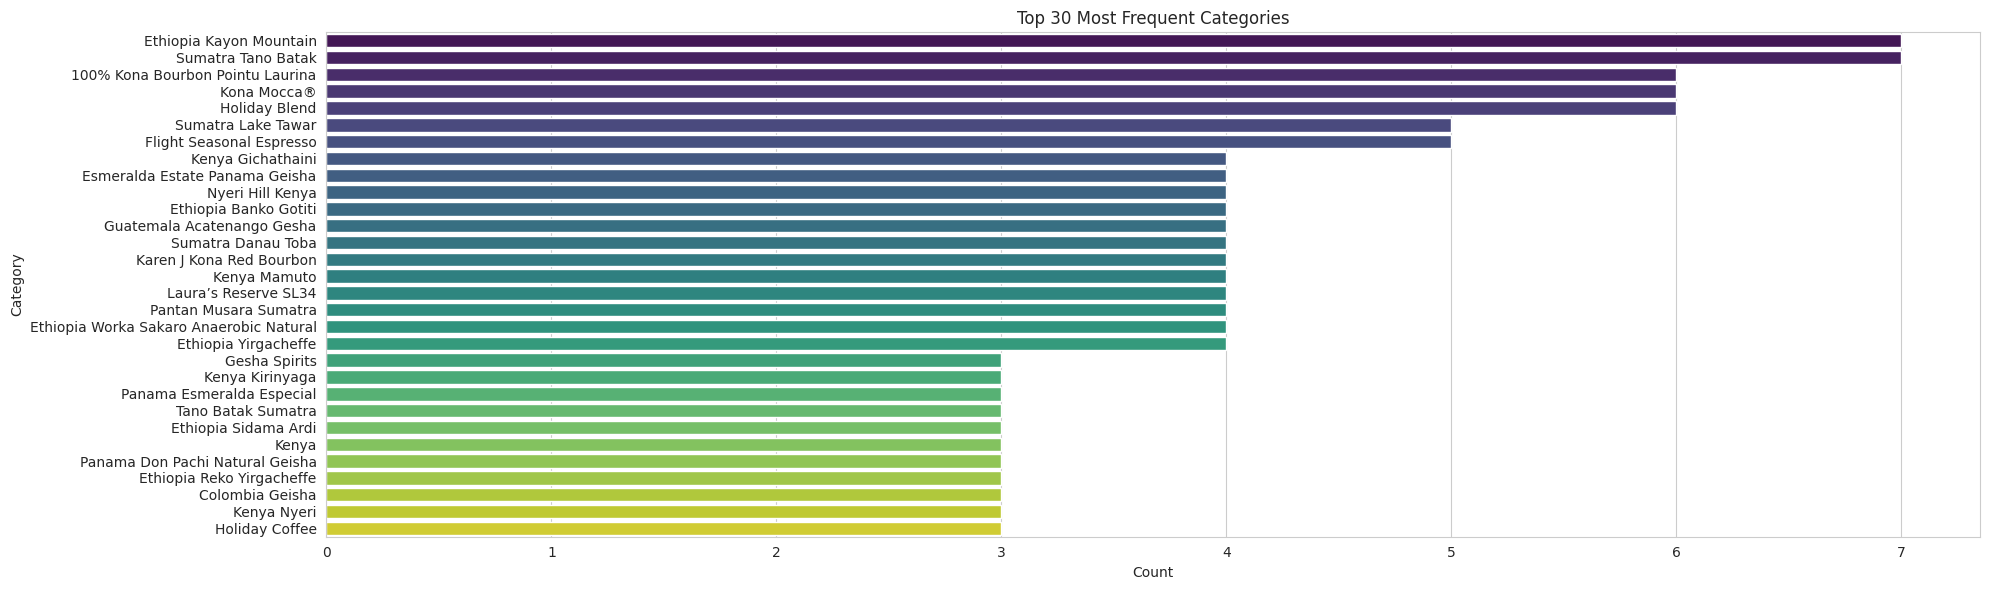

In [15]:
top_n = df['coffee_name'].value_counts().nlargest(30)

plt.figure(figsize=(20,6))
sns.barplot(x=top_n.values, y=top_n.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Top 30 Most Frequent Categories")
plt.tight_layout()
plt.show()

# Map vizualizaion of Coffee Origin

In [16]:
# Get the value counts
country_counts = df['coffee_origin'].value_counts().reset_index()
country_counts.columns = ['coffee_origin', 'count']  # Keep this if your column is 'coffee_origin'

# Now match the column name in locations
fig = px.choropleth(
    country_counts,
    locations='coffee_origin',             # ✅ match this to the column name
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Coffee Origins by Country'
)

fig.show()


# Map vizualizaion of Origin Country

In [17]:
# Get the value counts
country_counts = df['origin_country'].value_counts().reset_index()
country_counts.columns = ['origin_country', 'count']  # Keep this if your column is 'coffee_origin'

# Now match the column name in locations
fig = px.choropleth(
    country_counts,
    locations='origin_country',             
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Coffee Origins by Country'
)

fig.show()

# Map vizualizaion of Roaster Location

In [18]:
# Get the value counts
country_counts = df['roaster_location'].value_counts().reset_index()
country_counts.columns = ['roaster_location', 'count']  # Keep this if your column is 'coffee_origin'

# Now match the column name in locations
fig = px.choropleth(
    country_counts,
    locations='roaster_location',             
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Roaster location'
)

fig.show()


# Count Plot

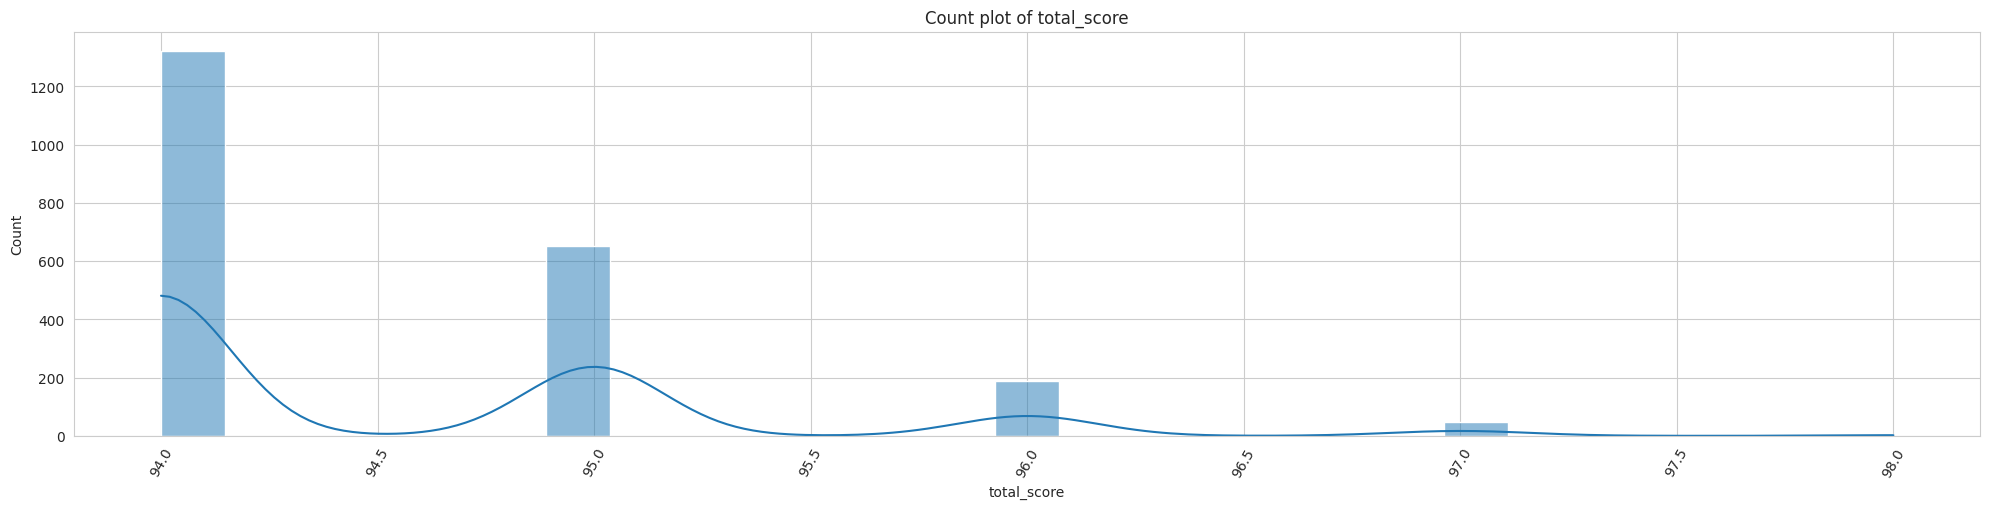

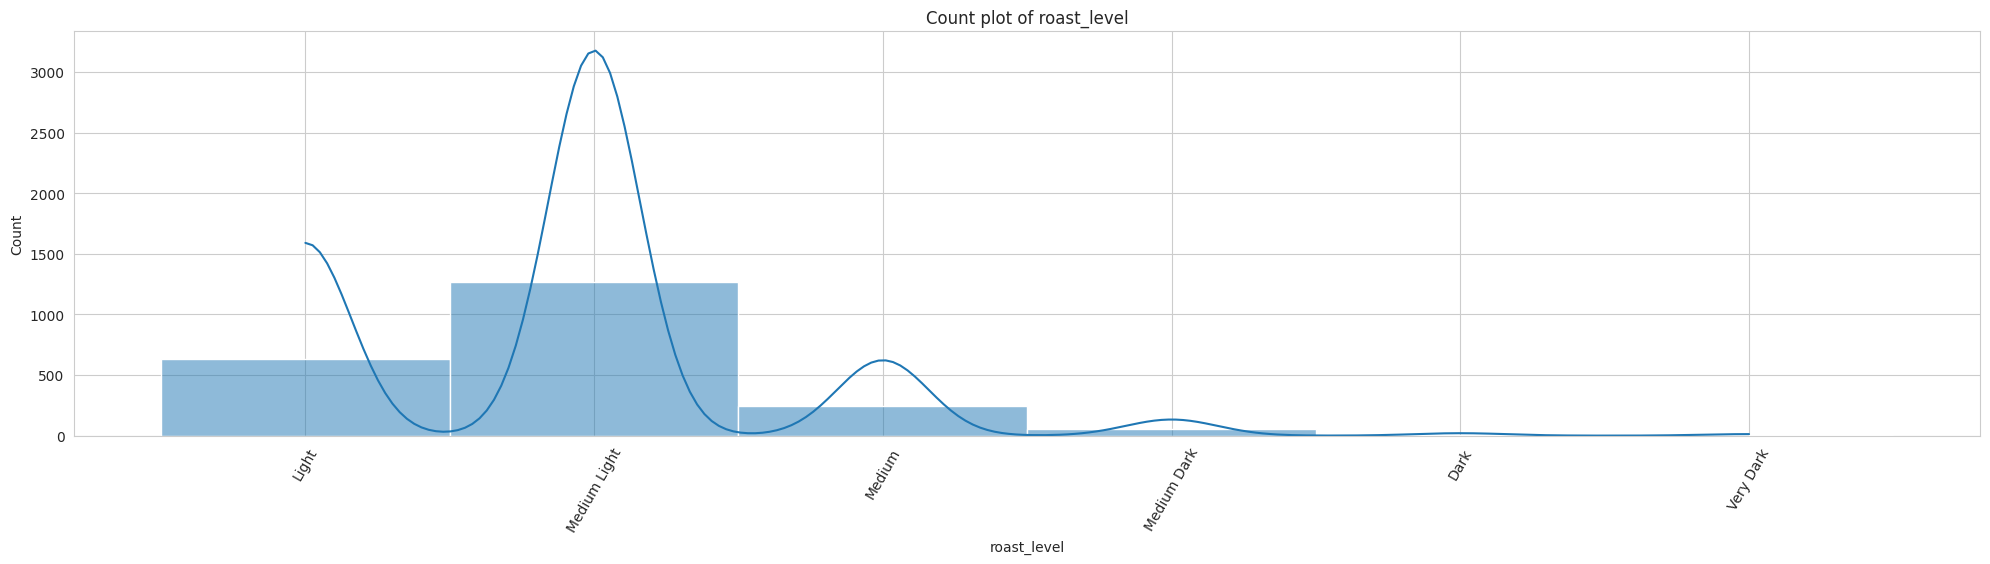

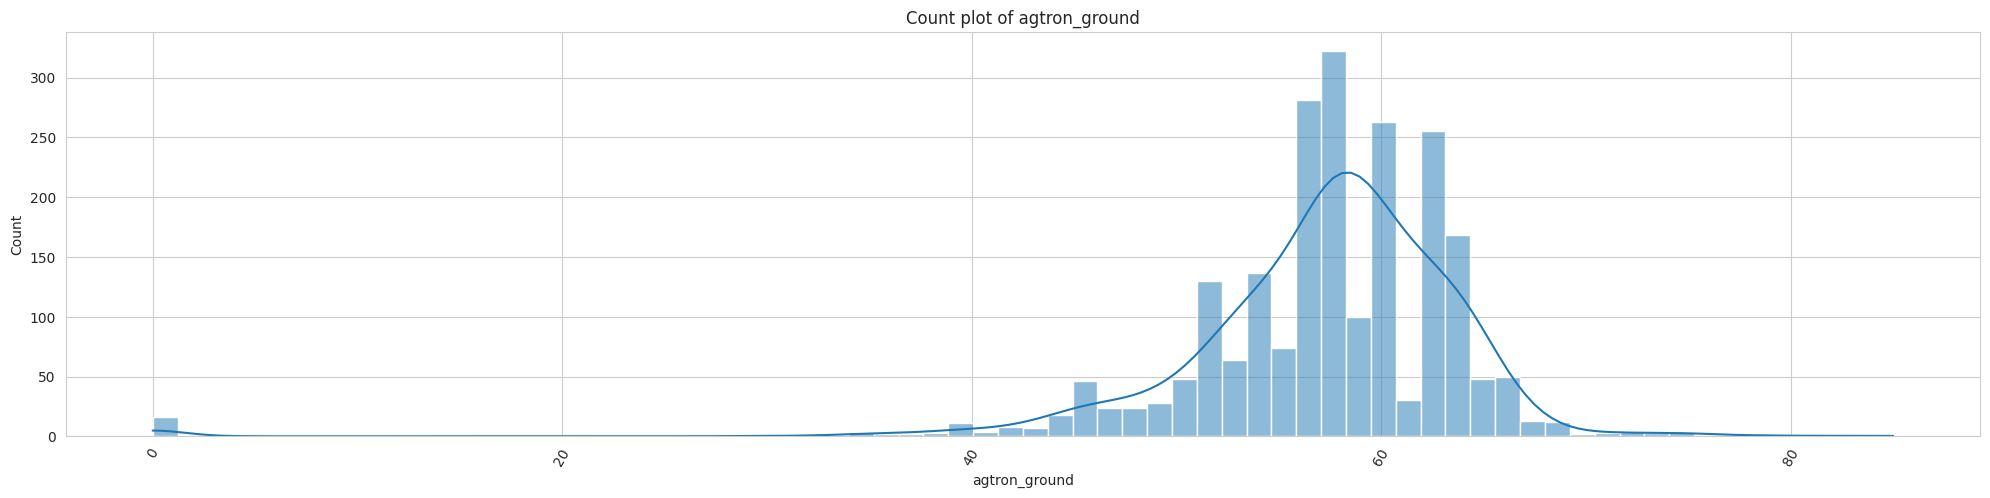

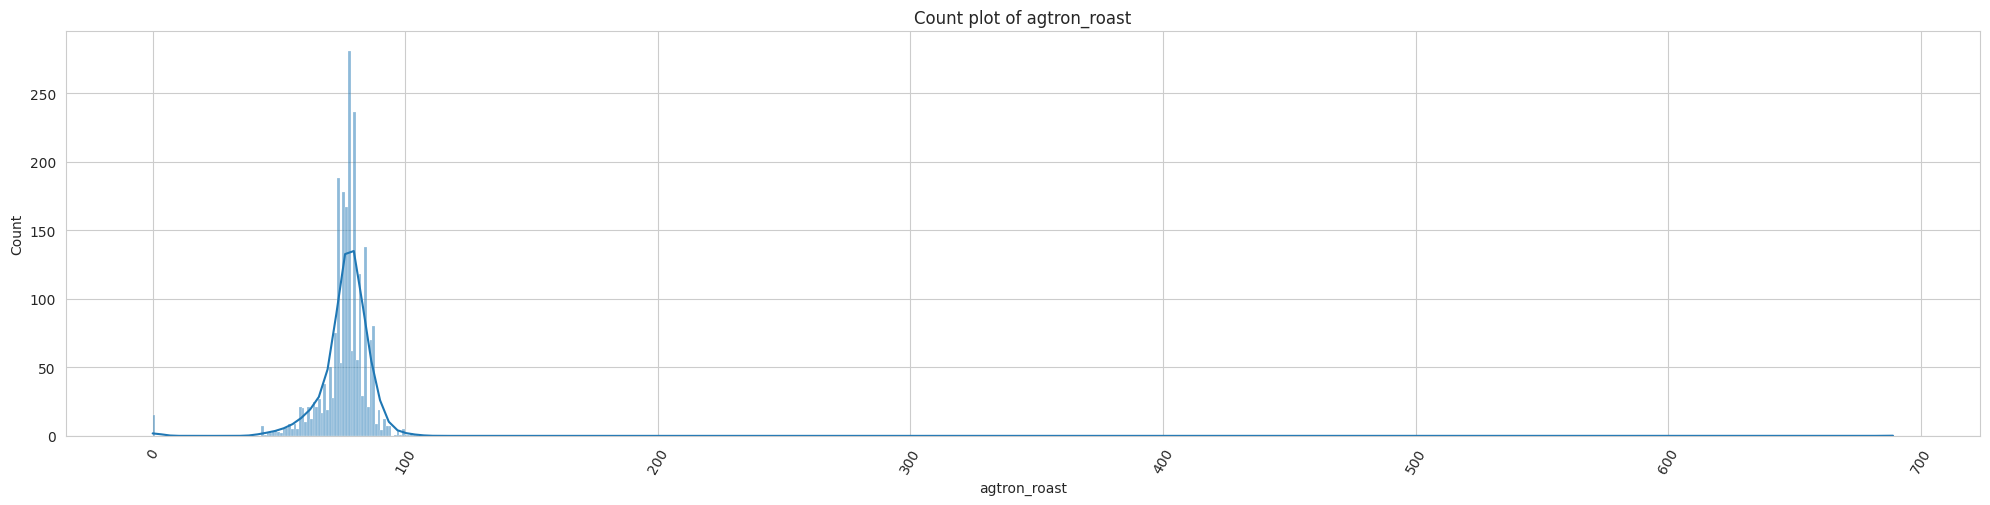

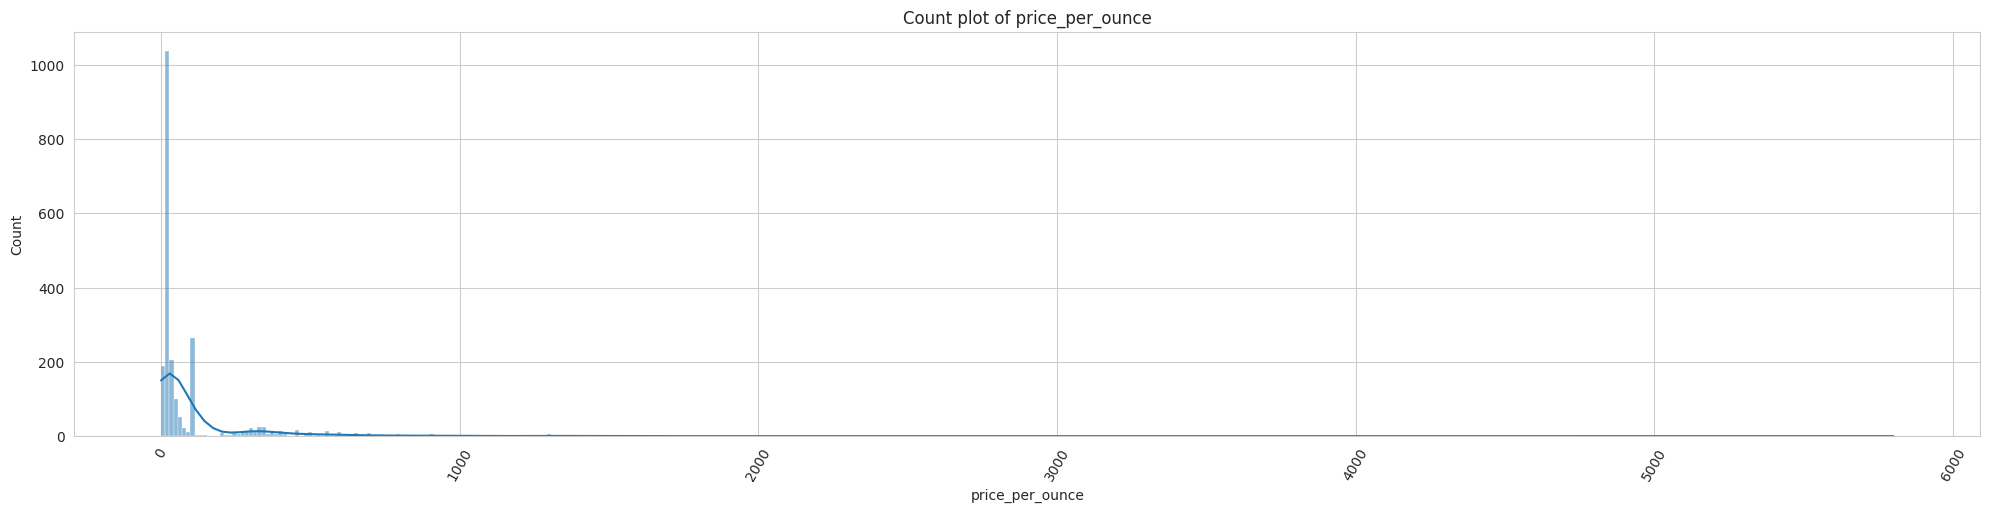

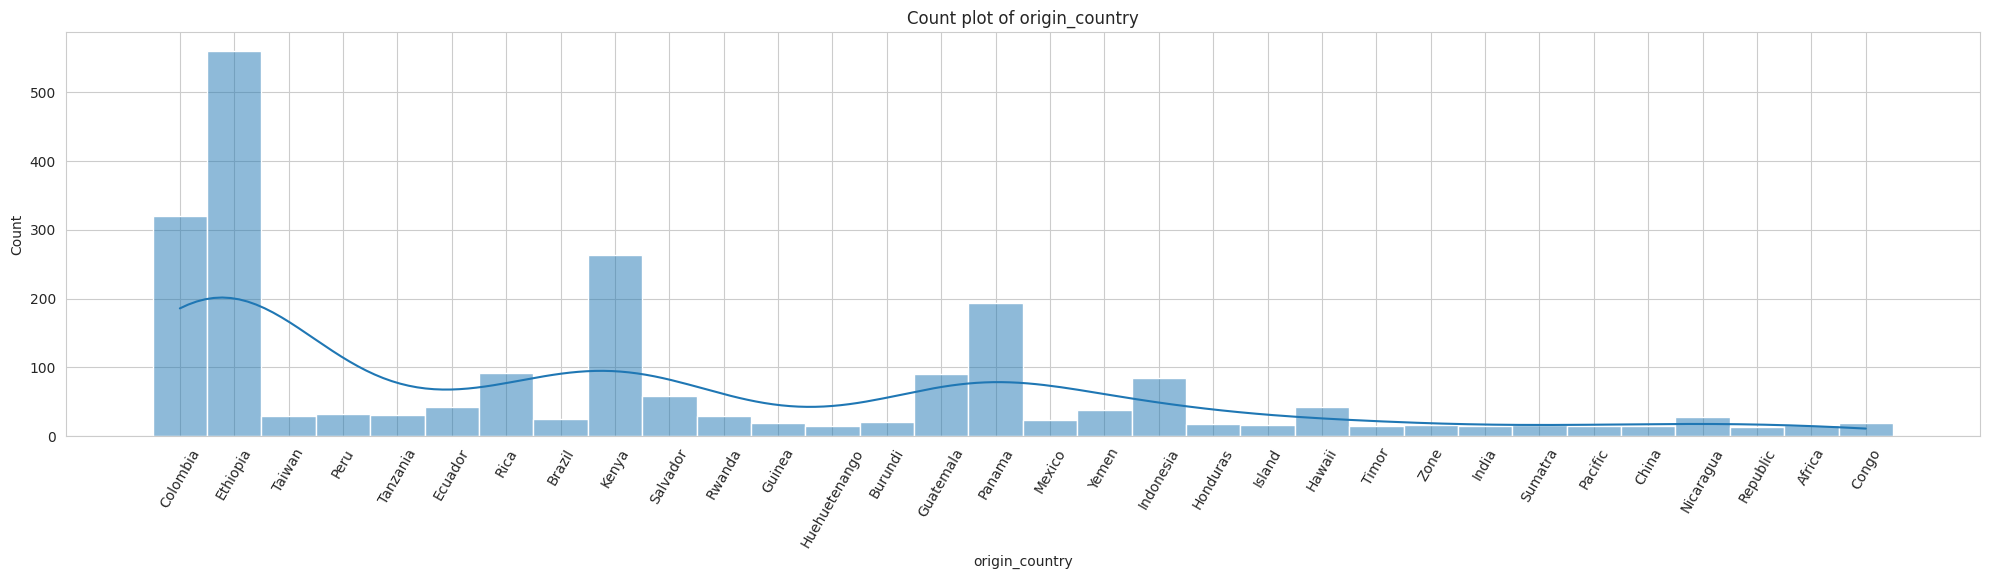

In [19]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(x=features,data=df,kde=True)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# Line plot

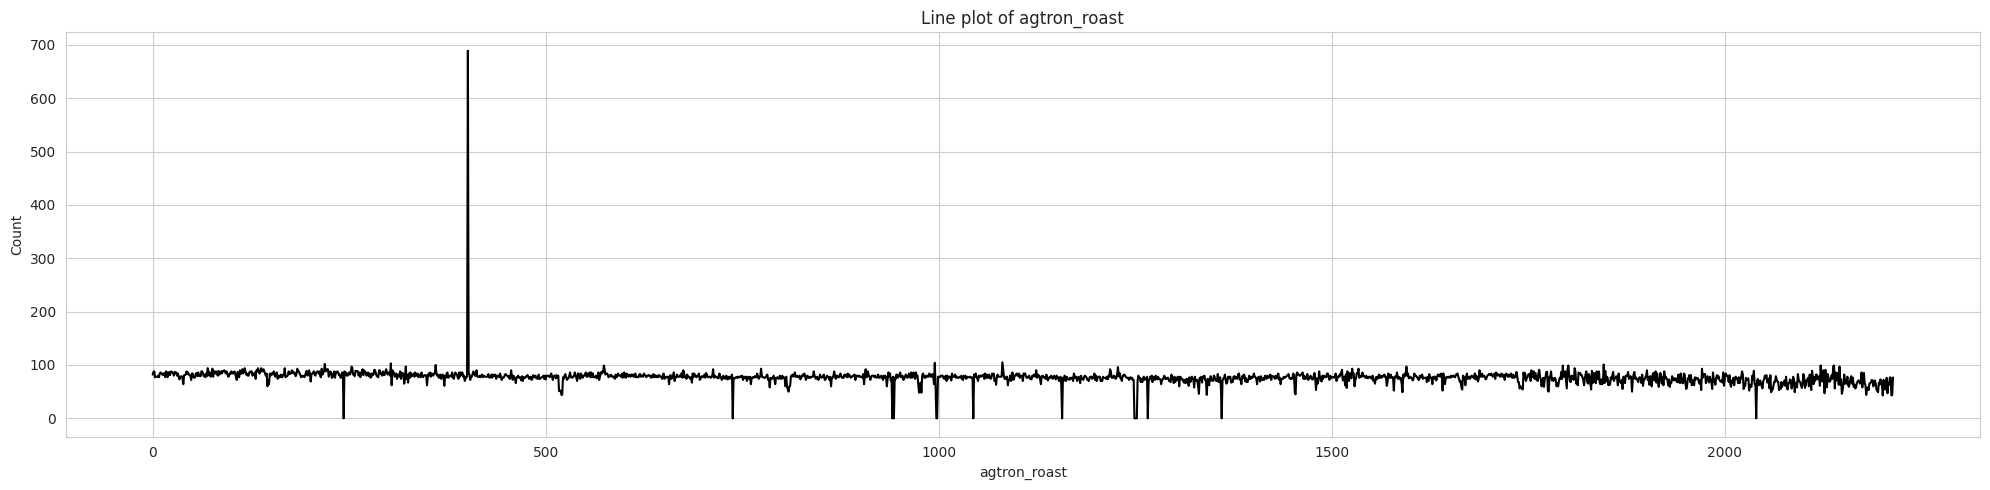

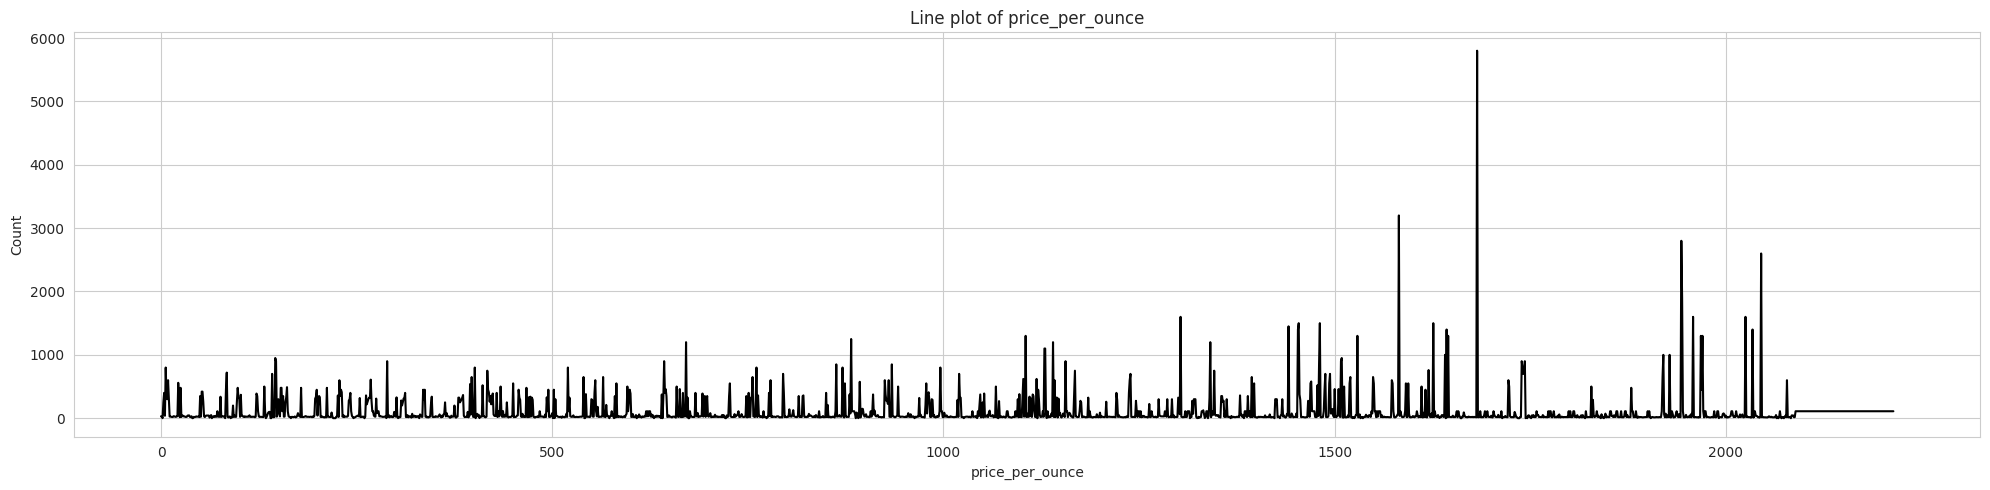

In [20]:
cols2 = ['agtron_roast',
       'price_per_ounce']
for features in cols2:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.lineplot(df[features].dropna(),color='black')
        plt.title(f"Line plot of {features}")
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       2215 non-null   object 
 1   total_score       2215 non-null   float64
 2   roaster_location  2215 non-null   object 
 3   coffee_origin     2215 non-null   object 
 4   roast_level       2215 non-null   object 
 5   est._price        2215 non-null   object 
 6   agtron_ground     2215 non-null   float64
 7   agtron_roast      2215 non-null   float64
 8   price_per_ounce   2215 non-null   float64
 9   origin_country    2215 non-null   object 
dtypes: float64(4), object(6)
memory usage: 173.2+ KB


# Model Section

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score,f1_score, recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [23]:
X = df.drop(columns=['coffee_name', 'total_score', 'roaster_location', 'coffee_origin',
       'roast_level', 'est._price', 'origin_country'],axis = 0)
y = df['total_score'].round(2)

In [24]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_scaled)
X_test = scaler.transform(X_test_scaled)

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [27]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [28]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score     MSE    RMSE     MAE
6  GradientBoosting    0.0680  0.4013  0.6335  0.5373
0  LinearRegression   -0.0033  0.4320  0.6573  0.5863
1             Ridge   -0.0033  0.4320  0.6573  0.5863
2             Lasso   -0.0040  0.4323  0.6575  0.5883
3        ElasticNet   -0.0040  0.4323  0.6575  0.5883
8        KNeighbors   -0.1743  0.5056  0.7111  0.5508
7          AdaBoost   -0.1987  0.5161  0.7184  0.6272
5      RandomForest   -0.3117  0.5648  0.7515  0.5737
9           XGBoost   -0.3994  0.6026  0.7763  0.5932
4      DecisionTree   -1.3300  1.0032  1.0016  0.6712


# CONCLUSION

>Giving poor Results, may be better feature engineering gives better results.